In [74]:
import pandas as pd 
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeRegressor 
import matplotlib.pyplot as plt 
import seaborn as sns 


df = pd.read_csv('music_data/train.csv')
df.head()

,SongLength,NumInstruments,Genre,Tempo,LyricalContent,ReleasedYear,Popularity
0,234.369261,4,Classical,84.774424,0.152603,2009,13.636534
1,343.876324,6,Jazz,65.486515,0.408796,1980,42.910689
2,305.973959,1,Jazz,164.752829,0.318433,1981,48.790880
3,158.897558,4,Pop,186.565004,0.680595,1984,68.362001
4,294.279271,4,Country,140.615871,0.969931,2015,86.969489


I'm loading in the data and printing out the first 5 records. Then I am checking for any null values in the data set.

# Checking for Null values

In [75]:
result = df.shape
print(result) # 8000 records 7 colums 

df.isnull().sum() # data null of null values

(8000, 7)


SongLength        0
NumInstruments    0
Genre             0
Tempo             0
LyricalContent    0
ReleasedYear      0
Popularity        0
dtype: int64

The data set did not have any null values.

# Check for Outliers 

Checking for outliers to the data set to see if it could effect my results. 

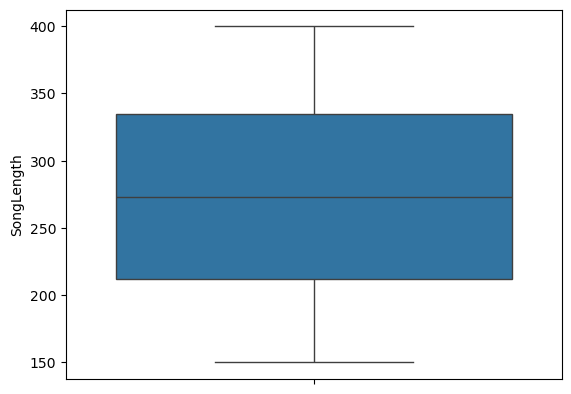

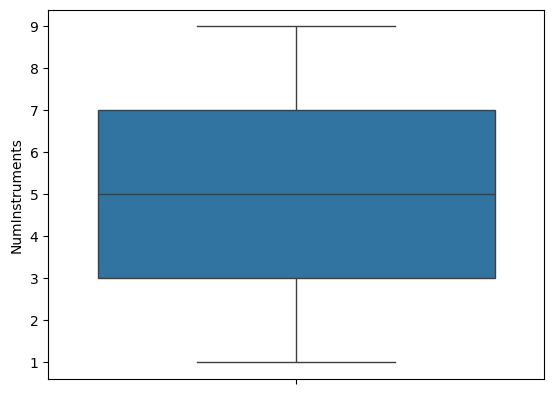

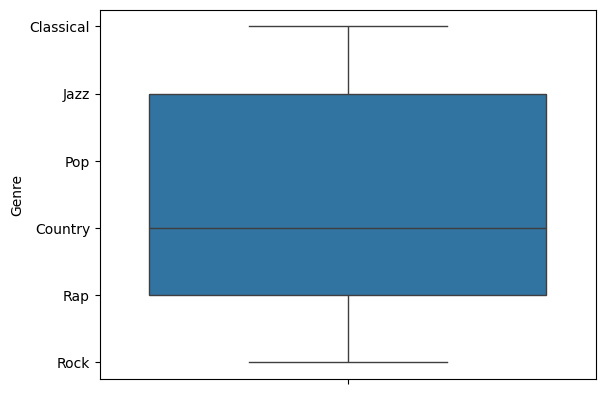

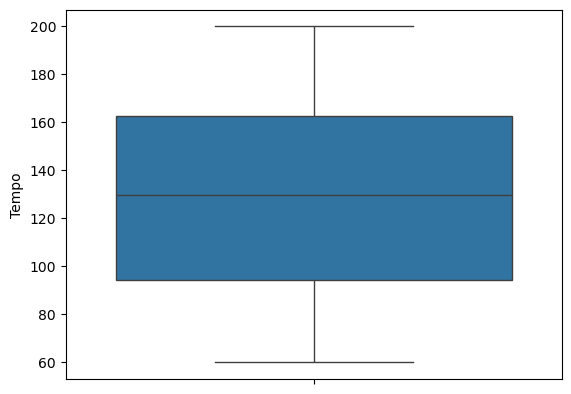

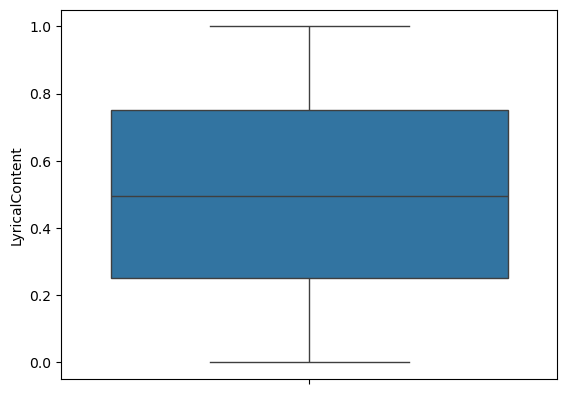

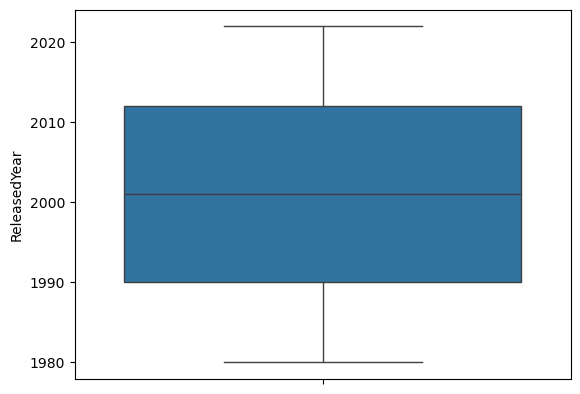

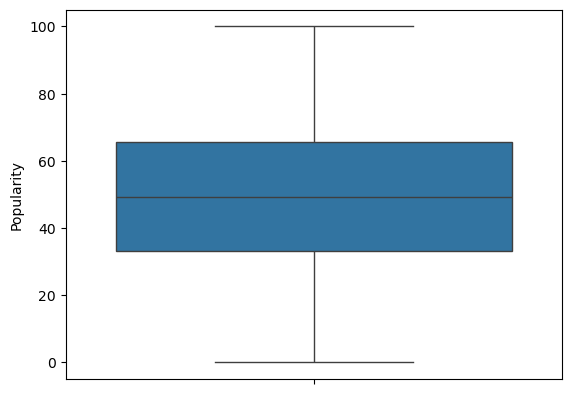

In [76]:
sns.boxplot(data=df['SongLength'])
plt.show()

sns.boxplot(data=df['NumInstruments'])
plt.show()

sns.boxplot(data=df['Genre'])
plt.show()

sns.boxplot(data=df['Tempo'])
plt.show()

sns.boxplot(data=df['LyricalContent'])
plt.show()

sns.boxplot(data=df['ReleasedYear'])
plt.show()

sns.boxplot(data=df['Popularity'])
plt.show()

There was not any outliers in the data set that out affect the overall results.
Next I had to One-Hot encode the categorical data in the data set, the only categorical data was Genre. 

# One-Hot Encoding Categorical Data 

In [77]:
# Get unique genres
unique_genres = df['Genre'].unique() 

# Print the unique genres
print(unique_genres)

# hot encode categorical data 
df = pd.get_dummies(df, columns=['Genre'])

# Check the DataFrame columns after one-hot encoding
print("DataFrame columns after one-hot encoding:")
print(df.columns.tolist())

['Classical' 'Jazz' 'Pop' 'Country' 'Rap' 'Rock']
DataFrame columns after one-hot encoding:
['SongLength', 'NumInstruments', 'Tempo', 'LyricalContent', 'ReleasedYear', 'Popularity', 'Genre_Classical', 'Genre_Country', 'Genre_Jazz', 'Genre_Pop', 'Genre_Rap', 'Genre_Rock']


In [78]:
# Check the DataFrame columns after one-hot encoding
print("DataFrame columns after one-hot encoding:")
print(df.columns.tolist())

DataFrame columns after one-hot encoding:
['SongLength', 'NumInstruments', 'Tempo', 'LyricalContent', 'ReleasedYear', 'Popularity', 'Genre_Classical', 'Genre_Country', 'Genre_Jazz', 'Genre_Pop', 'Genre_Rap', 'Genre_Rock']


Next I had to establish a threshold in my data to determine what would be considered unpopular and what would be considered popular. I determined this by looking at the distribution of popularity this will be used for the confusion matrix and logical regression to classify what is popular or unpopular

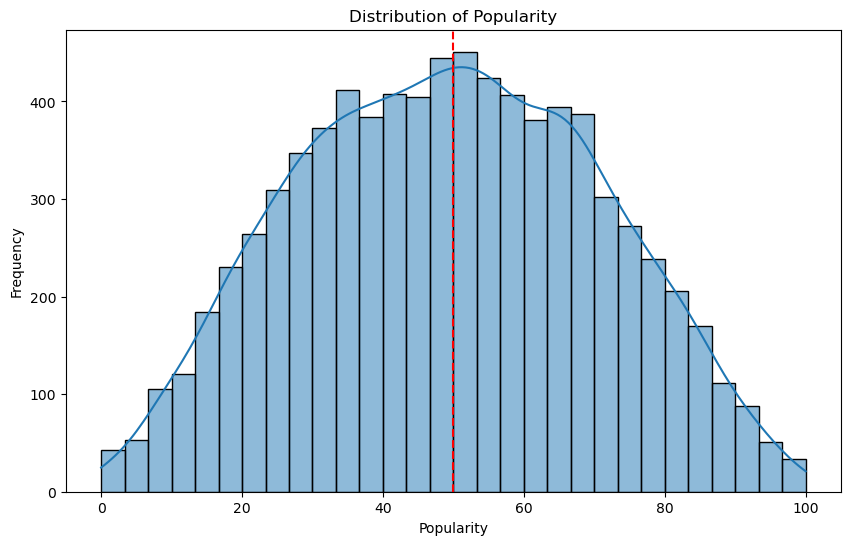

In [79]:
threshold = 50



# Plot the histogram of the Popularity column
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=30, kde=True)  # KDE adds a density plot
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.axvline(x=threshold, color='r', linestyle='--')  # Optional: add a line for your threshold
plt.show()

Creating a feature matrix (X) contains all the columns in X_cols which will be used to make predictions
Creating Y vector contains the popularity the column I want to predict. 

In [80]:


#identify features and target
X_cols = ['SongLength', 'NumInstruments', 'Tempo', 'LyricalContent', 'ReleasedYear',
          'Genre_Classical', 'Genre_Jazz', 'Genre_Pop', 'Genre_Country', 'Genre_Rap', 'Genre_Rock']

X = df[X_cols]
y = df['Popularity']

print(y.head())
print(y.dtype)


0    13.636534
1    42.910689
2    48.790880
3    68.362001
4    86.969489
Name: Popularity, dtype: float64
float64


In [81]:
# Define a threshold based on your analysis or visualization
threshold = 50  # Example threshold, adjust based on your dataset
df['Popularity'] = (df['Popularity'] > threshold).astype(int)  # Convert to binary

# Now redefine y after binarization
y = df['Popularity']


# Linear Regression Model

Linear Regression Mean Squared Error: 0.08030362671815033


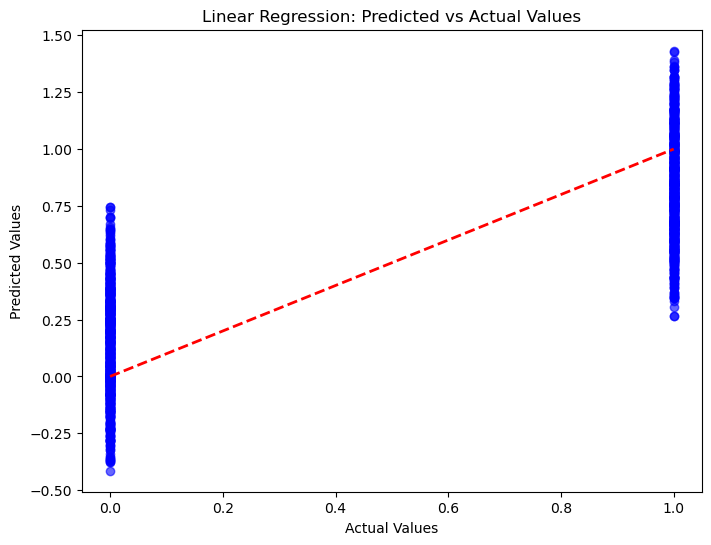

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#instantiate model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression Mean Squared Error: {mse}")

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)  # 45-degree line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Predicted vs Actual Values")
plt.show()



# Logistic Regression

Logistic Regression Accuracy: 0.930625
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       795
           1       0.93      0.93      0.93       805

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600



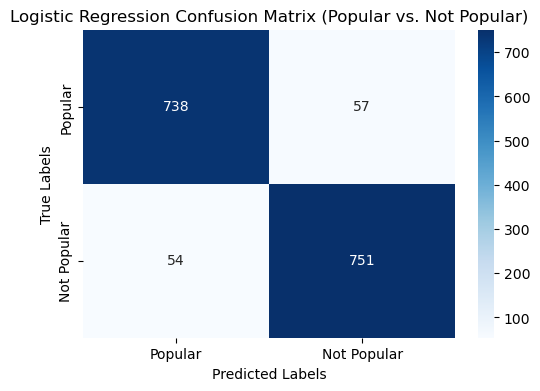

In [83]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

log_reg_model = LogisticRegression()
log_reg_model.fit(X_train,y_train)

y_pred = log_reg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

conf_matrix_log = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", xticklabels=["Popular", "Not Popular"], yticklabels=["Popular", "Not Popular"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Logistic Regression Confusion Matrix (Popular vs. Not Popular)")
plt.show()


Logical Regression Confustion matrix interpretation 

True Positive (TP): 738 — These are the cases where the model correctly predicted the song as "Popular."

False Negative (FN): 57 — These are the cases where the model incorrectly predicted "Not Popular," but the actual label was "Popular."

False Positive (FP): 54 — These are the cases where the model incorrectly predicted "Popular," but the actual label was "Not Popular."

True Negative (TN): 751 — These are the cases where the model correctly predicted the song as "Not Popular."

# Decision Tree Regression

Decision Tree Regression Mean Squared Error: 0.100625


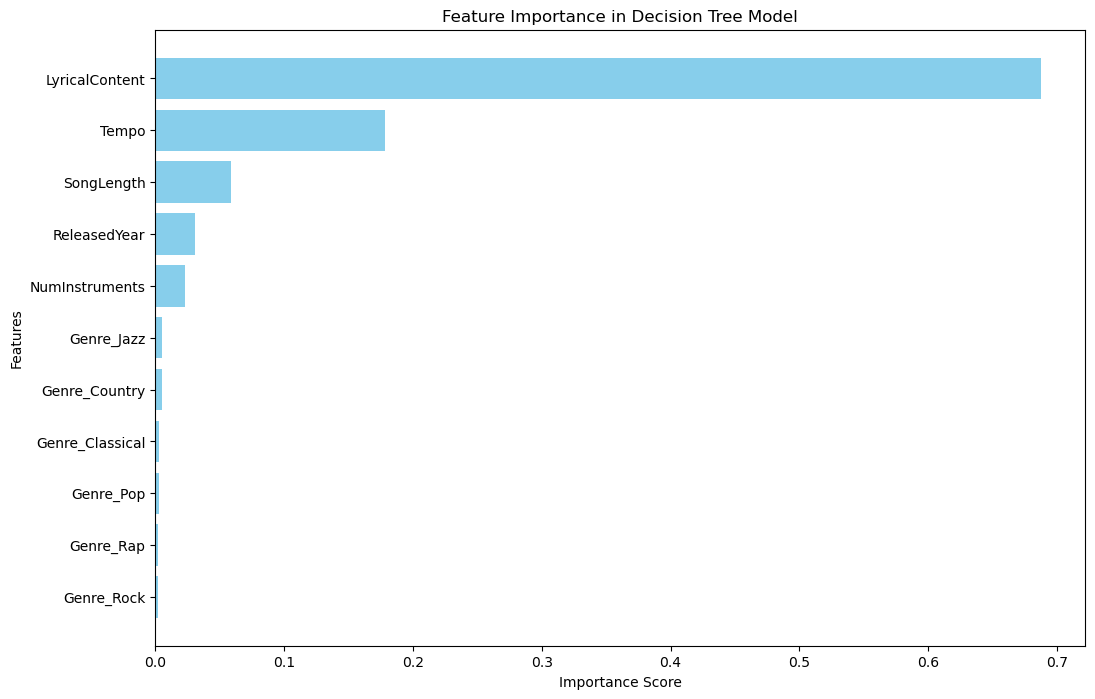

SongLength: 0.0590
NumInstruments: 0.0229
Tempo: 0.1787
LyricalContent: 0.6874
ReleasedYear: 0.0310
Genre_Classical: 0.0033
Genre_Jazz: 0.0053
Genre_Pop: 0.0030
Genre_Country: 0.0050
Genre_Rap: 0.0023
Genre_Rock: 0.0020


In [84]:

tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred)
print(f"Decision Tree Regression Mean Squared Error: {mse_tree}")

import matplotlib.pyplot as plt
import numpy as np

# Features used in the model
features = ['SongLength', 'NumInstruments', 'Tempo', 'LyricalContent', 'ReleasedYear',
            'Genre_Classical', 'Genre_Jazz', 'Genre_Pop', 'Genre_Country', 'Genre_Rap', 'Genre_Rock']

# Feature importance values from the DecisionTreeRegressor
feature_importances = tree_reg.feature_importances_  # Use the fitted model's feature_importances_

# Sort the features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plot the feature importance as a bar chart
plt.figure(figsize=(12, 8))
plt.barh(sorted_features, sorted_importances, color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree Model")
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature at the top
plt.show()

# Print feature importance values
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Random Forest Regression

Random Forest Regression Mean Squared Error: 0.0526838125


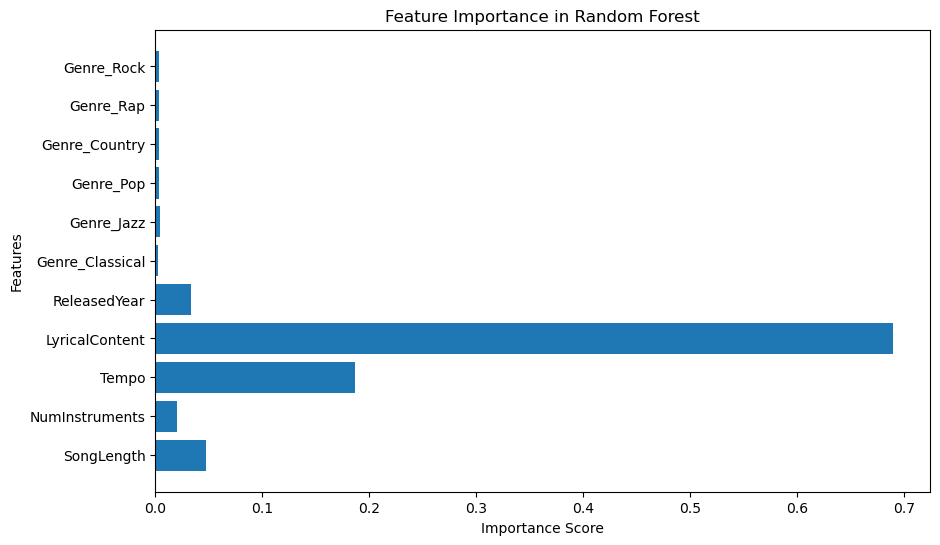

SongLength: 0.0471
NumInstruments: 0.0205
Tempo: 0.1870
LyricalContent: 0.6901
ReleasedYear: 0.0335
Genre_Classical: 0.0028
Genre_Jazz: 0.0042
Genre_Pop: 0.0040
Genre_Country: 0.0037
Genre_Rap: 0.0038
Genre_Rock: 0.0033


In [85]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


forest = RandomForestRegressor(random_state=0, n_estimators=100)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

mse_forest = mean_squared_error(y_test, y_pred)
print(f"Random Forest Regression Mean Squared Error: {mse_forest}")

import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from Random Forest model
feature_importances = forest.feature_importances_

# Create a horizontal bar chart for visualization
features = X.columns  # Use the column names from the original DataFrame
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.ylabel("Features")
plt.xlabel("Importance Score")
plt.title("Feature Importance in Random Forest")
plt.show()

# Print feature importance values
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance:.4f}")




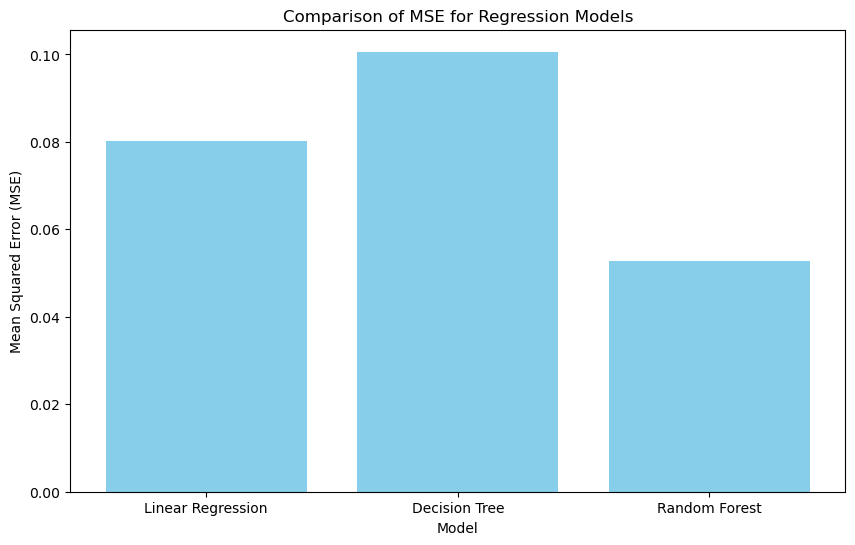

In [86]:
import matplotlib.pyplot as plt

# MSE-based models (Linear Regression, Decision Tree, Random Forest)
mse_models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_scores = [mse, mse_tree, mse_forest]  # List of MSE for each model

# Accuracy-based model (Logistic Regression)
accuracy_models = ['Logistic Regression']
accuracy_scores = [accuracy]  # Accuracy for Logistic Regression

# Plotting MSE comparison
plt.figure(figsize=(10, 6))
plt.bar(mse_models, mse_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE for Regression Models')
plt.show()


Overall the Decision Tree model did the worst with the highest mean squared error, but when puting many trees together and creating a Random Forest model did the best with the lowest MSE, the linear regression did okay but had trouble with the data because it was expecting popular to be a continuous value instead of binary. The logistic regression model did well with a 0.93 accuracy rating and made 1,498 correct predictions and 111 incorrect perdictions.


Future work or areas for improvements

Some areas of improvement for this project would be to get the accuracy rating from the logistical regression model higher. This could be done with perhaps a different threshold than the one I defined, also a more diverse dataset. The data is the data set was very similar to each other with a very consistant range of values. I also think that the Random forest model could be tweaked some more to get the mean squared error even lower. 